In [1]:
import re
import pickle
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/content/'
import seaborn as sns

In [2]:
dataset =pd.read_csv('Merged_Dataset.csv')
dataset.rename(columns={'tweets': 'label'}, inplace=True)

In [3]:
dataset.head()

,label,clean_tweets
0,2,woman shouldnt complain cleaning house . man a...
1,1,boy dats cold.tyga dwn bad cuffin dat hoe st p...
2,1,Dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [4]:
print(dataset.shape)

(44892, 2)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
stopwords_list = 'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
dataset['clean_tweets'] = dataset['clean_tweets'].apply(lambda x: str(x))

In [7]:
dataset.head()

,label,clean_tweets
0,2,woman shouldnt complain cleaning house . man a...
1,1,boy dats cold.tyga dwn bad cuffin dat hoe st p...
2,1,Dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [8]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.clean_tweets) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].clean_tweets) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].clean_tweets)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].clean_tweets))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  1
Number of Documents:25130
Number of Words:230167
Number of Unique Words:23904
Most Frequent Words:

bitch	8487
.	7819
,	4384
bitches	3199
like	2969
hoes	2409
pussy	2098
hoe	1948
im	1839
ass	1647

Class Name :  2
Number of Documents:12353
Number of Words:141113
Number of Unique Words:22220
Most Frequent Words:

.	2551
white	1998
,	1344
�	1080
like	1071
people	933
women	788
trash	760
get	623
one	580

Class Name :  0
Number of Documents:7409
Number of Words:93606
Number of Unique Words:15324
Most Frequent Words:

nigger	1692
white	1146
kike	849
like	834
.	766
niggers	650
fuck	538
jews	515
fucking	487
faggot	487
Total Number of Unique Words:39289


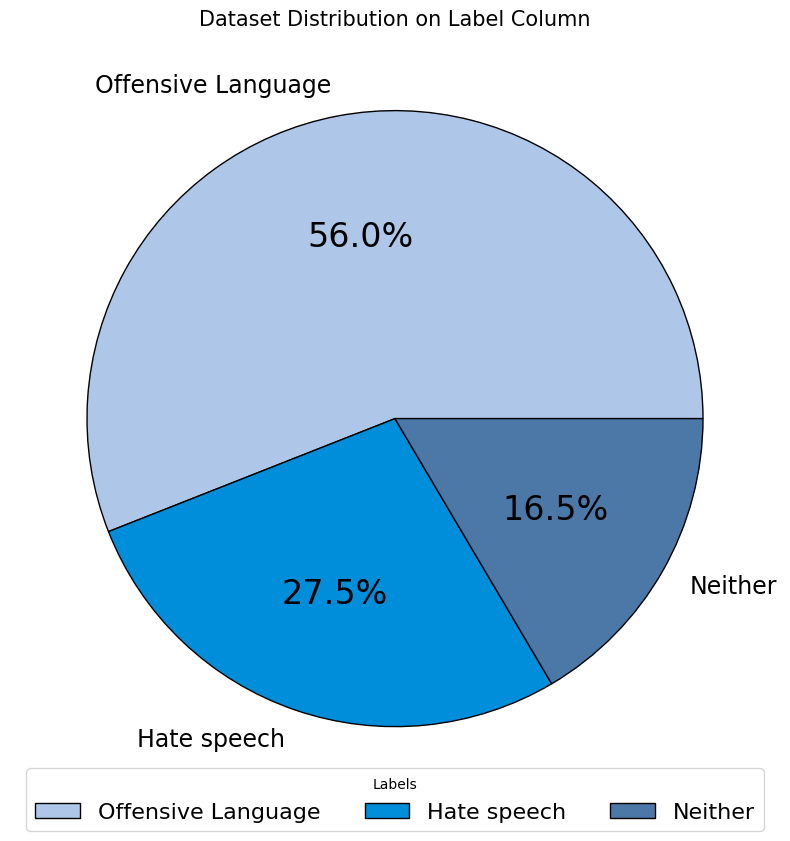

In [13]:
# Count the occurrences of each label
label_counts = dataset['label'].value_counts()

# Define the labels as per the unique values sorted by index
class_names = ["Offensive Language", "Hate speech", "Neither"]

# Define colors (shades of blue)
colors = ['#aec7e8', '#008DDA', '#4c78a8']  # Shades of blue

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(label_counts, labels=class_names, colors=colors, autopct='%1.1f%%',
                                   wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 17})

# Increase font size for percentages
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(24)

plt.title('Dataset Distribution on Label Column', fontsize=15)
plt.legend(class_names, title="Labels", loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=16)
plt.show()

<ipython-input-25-e94f2b59ff41>:13: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=df, x='Class Names', y='Values', hue='Category', palette=shades_of_blue, edgecolor='black')
<ipython-input-25-e94f2b59ff41>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Offensive Language', 'Neutral', 'Hate Speech'])


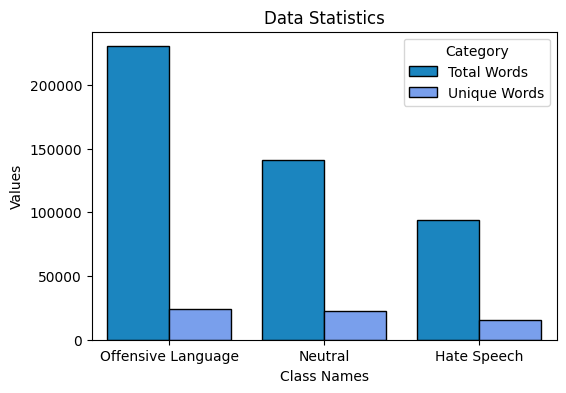

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_matrix = pd.DataFrame({'Total Comments': documents, 'Total Words': words, 'Unique Words': u_words, 'Class Names': class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

# Filter the DataFrame to exclude "Total Documents"
df = df[df['Category'] != 'Total Comments']

plt.figure(figsize=(6, 4))
ax = plt.subplot()
shades_of_blue = ['#008DDA', '#6699FF', '#99CCFF', '#CCE5FF']
sns.barplot(data=df, x='Class Names', y='Values', hue='Category', palette=shades_of_blue, edgecolor='black')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')
ax.set_xticklabels(['Offensive Language', 'Neutral', 'Hate Speech'])

# Move the x-axis title position down
x_label = ax.get_xlabel()
x_label_position = ax.xaxis.get_label().get_position()
ax.xaxis.get_label().set_position((x_label_position[0], x_label_position[1] - 0.05))

plt.show()

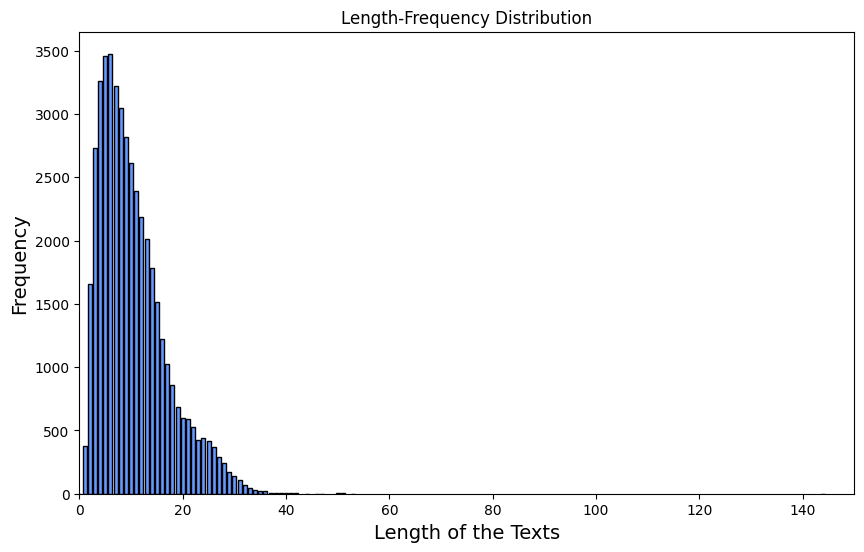

Maximum Length of a review: 144
Minimum Length of a review: 0
Average Length of a reviews: 10.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.clean_tweets.apply(lambda x: len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0) + 1

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(frequency.keys(), frequency.values(), color='#6699FF', edgecolor='black')  # Light blue color and black border
plt.xlim(0, 150)
plt.xlabel('Length of the Texts', fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.title('Length-Frequency Distribution')
plt.show()

print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength), 0)}")

<ipython-input-27-8aebf1b8d3ef>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=data, palette='Blues_d')
<ipython-input-27-8aebf1b8d3ef>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['Most frequent word'])


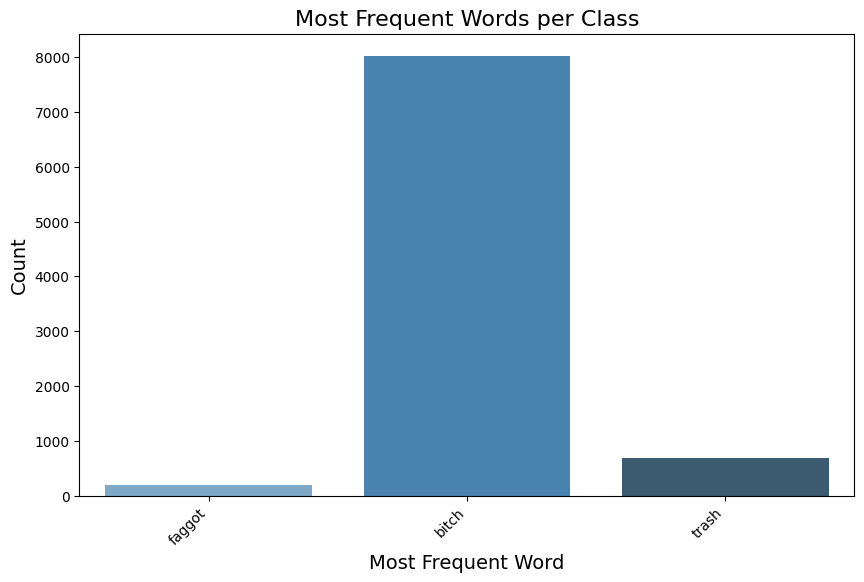

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is in the form of a dictionary
data = {
    'Class': ['0 (Hate Speech Class)', '1 (Offensive Language Class)', '2 (Neutral Class)'],
    'Most frequent word': ['faggot', 'bitch', 'trash'],
    'Count': [189, 8023, 687]
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Class', y='Count', data=data, palette='Blues_d')

# Set the x-tick labels to the 'Most frequent word' column
ax.set_xticklabels(data['Most frequent word'])

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Most Frequent Word', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Frequent Words per Class', fontsize=16)

# Show the plot
plt.show()

In [ ]:
def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:
def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test



def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        reviews: a list of cleaned reviews

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [ ]:

                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """

    lr_model = LogisticRegression(random_state = 123, max_iter=1000)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(f1_score(y_test, pred_y, average='weighted'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y , average='weighted'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y , average='weighted'),4)*100

    return my_dict

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.clean_tweets, gram)
    labels = label_encoding(dataset.label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 21613

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 24783 
	Training		 19826 
	Test			 4957


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 140228

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 24783 
	Training		 19826 
	Test			 4957


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 287349

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 24783 
	Training		 19826 
	Test			 4957


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")




========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     89.33      87.73   89.33     87.73          LR
1     87.61      87.35   87.61     87.35          DT
2     88.88      87.11   88.88     87.11          RF
3     84.53      81.59   84.53     81.59         MNB
4     80.84      78.95   80.84     78.95         KNN
5     88.54      85.94   88.54     85.94  Linear SVM
6     89.33      86.90   89.33     86.90     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 89.33
Highest F1-Score achieved by LR at = 87.72999999999999
Highest Precision Score achieved by LR at = 87.72999999999999
Highest Recall Score achieved by LR at = 89.33

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     87.37      84.94   87.37     84.94          LR
1     87.71      87.54   87.71     87.54          DT
2     87.92      85.69   87.92     85.69       

<ipython-input-18-585c87e954af>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
<ipython-input-18-585c87e954af>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
<ipython-input-18-585c87e954af>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);


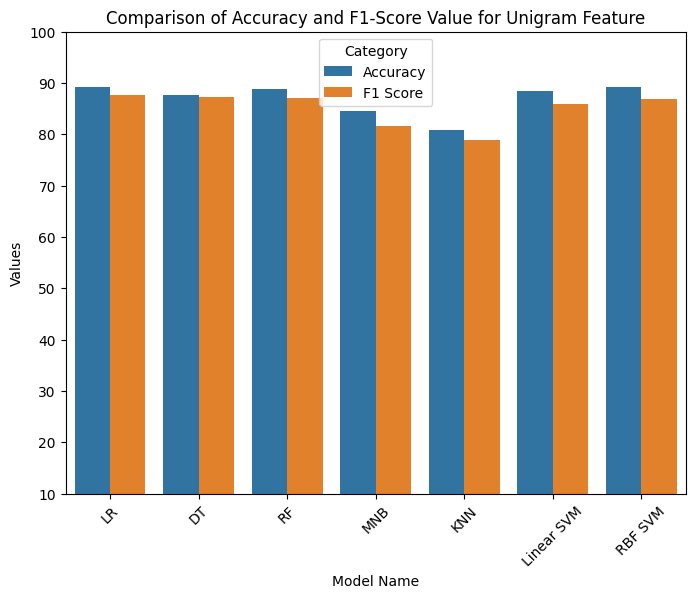

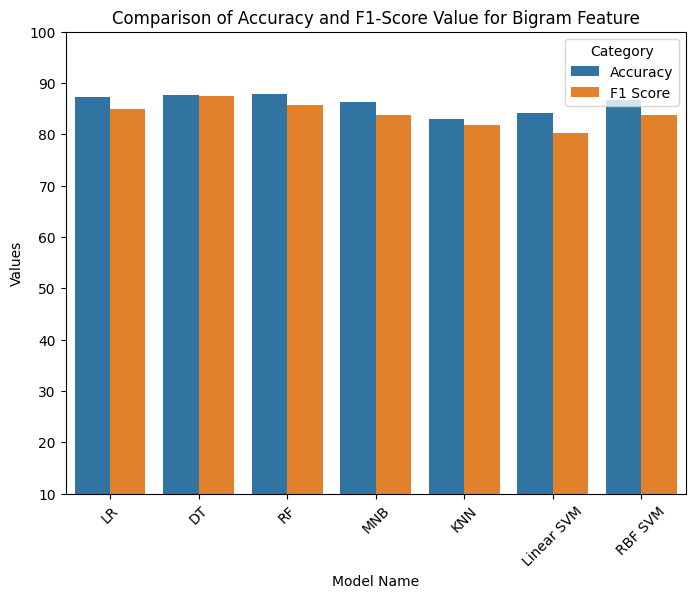

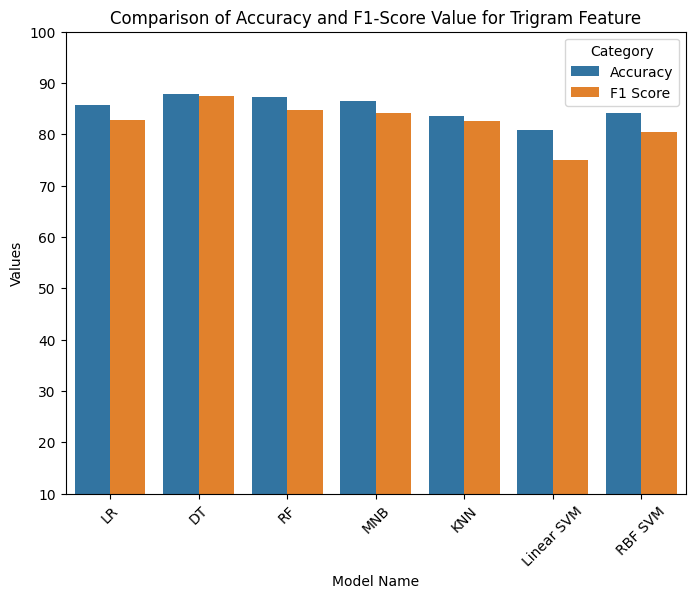

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,100])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);